In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## Question 1
### Develop code which accepts a square matrix of size 'MxM' and swaps elements from the left diagonal with right diagonal or vice-versa (Use Numpy to create the matrix).

In [2]:
# print ('Enter size of square matrix: ')
M = int(input())
N = np.zeros([M, M])

for i in range(M):
    for j in range(M):
        print ('Enter element at ' + str(i) + ', ' + str(j) + ': ')
        N[i, j] = input()

print (N)

4
Enter element at 0, 0: 
1
Enter element at 0, 1: 
2
Enter element at 0, 2: 
3
Enter element at 0, 3: 
4
Enter element at 1, 0: 
5
Enter element at 1, 1: 
6
Enter element at 1, 2: 
7
Enter element at 1, 3: 
8
Enter element at 2, 0: 
9
Enter element at 2, 1: 
10
Enter element at 2, 2: 
11
Enter element at 2, 3: 
12
Enter element at 3, 0: 
13
Enter element at 3, 1: 
14
Enter element at 3, 2: 
15
Enter element at 3, 3: 
16
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]


In [3]:
def diagonal_swap(array):
    newarray = np.zeros([M, M], dtype=N.dtype)
    for i in range(M):
        for j in range(M):
            if (i+j == M-1):
                newarray[i, j] = array[i, M-1-j]
            elif (i==j):
                newarray[i, j] = array[i, M-1-j]
            else:
                newarray[i, j] = array [i, j]
    return newarray

In [4]:
print (diagonal_swap(N))

[[ 4.  2.  3.  1.]
 [ 5.  7.  6.  8.]
 [ 9. 11. 10. 12.]
 [16. 14. 15. 13.]]


In [5]:
#Just to restore the test matrix quickly
N = np.arange(1, 17).reshape(4, 4)
N

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

## Question 2
### Develop code which accepts a text file as input and prints the text in a new file with the first alphabet of each word capitalized. Also, print the total number of white spaces in the new file.

In [6]:
file = open("Assignment1_Q2.txt", "r+")
txt = file.read()    #For some reason, working directly with file.read() as a string wasn't updating count
print (txt)
print()

txt2 = txt.title()
print (txt2)
print()

count = 0
for i in range(len(txt2)):
    if txt2[i]==" ":
        count +=1
print ("Number of spaces:", count)

hello, how are you?
today, we are testing a numpy program as a part of our assignment.

Hello, How Are You?
Today, We Are Testing A Numpy Program As A Part Of Our Assignment.

Number of spaces: 15


## Question 3
### Develop code using numpy, to generate a random numbers series having total 1000 numbers (only integers in range 1 to 100), and calculate the frequency of the unique items in the series. Subsequently, convert this frequency table into a Histogram.

In [7]:
s = pd.Series(np.random.randint(1, 101, 1000))
#Series of 1000 numbers ranging from 1 (inclusive) to 101 (exclusive)
s

0      26
1      71
2      11
3      21
4      67
       ..
995    54
996    33
997    58
998    88
999     2
Length: 1000, dtype: int32

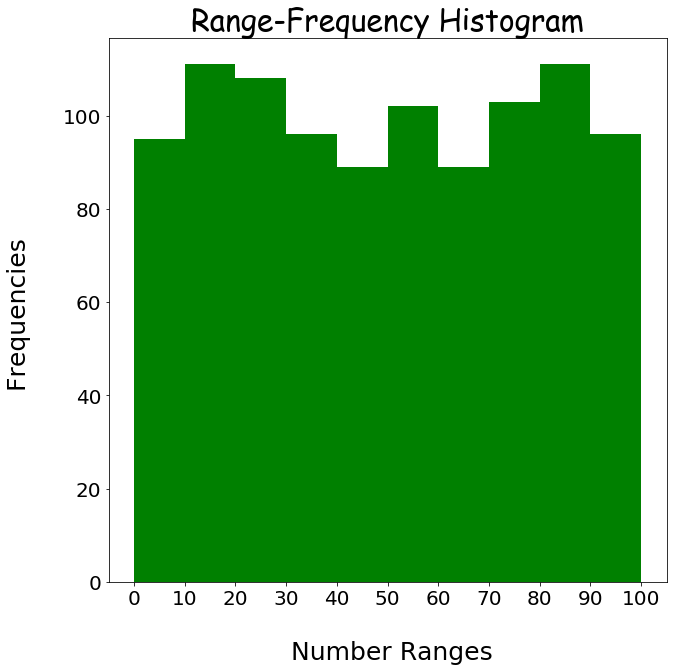

In [40]:
plt.figure(figsize=(10, 10))

bins = list(range(0, 101, 10))
plt.hist(s, color="g", bins=bins)

plt.title('Range-Frequency Histogram', fontdict={'fontname':'Comic Sans MS', 'size':30})
plt.xlabel('\n Number Ranges', fontdict={'size':25})
plt.ylabel('Frequencies \n', fontdict={'size':25})

plt.xticks(bins, fontsize=20)
plt.yticks(fontsize=20)

plt.show()
#Not sure why the histogram is coming out like this

## Question 4
### In above frequency table representing series of random numbers, retain only top 5 most frequent values as they are and replace everything else as ‘Other’, and show them on the bar chart.

In [13]:
freq.iloc[:, 1]

0     20
1     19
2     17
3     16
4     16
      ..
95     5
96     5
97     4
98     4
99     3
Name: Frequency, Length: 100, dtype: int64

In [14]:
sum_other = freq.iloc[:, 1].sum() - freq.iloc[0:5, 1].sum()
#Did this as freq.iloc[5:-1, 1].sum() was returning 910 by excluding the last row
sum_other

912

In [15]:
freq2 = pd.DataFrame(freq.iloc[0:5, 0:2])    #Had to convert it from a series to a dataframe
freq2

,Number,Frequency
0,1,20
1,18,19
2,23,17
3,89,16
4,80,16


In [16]:
freq2.loc[5, :] = ["Other", sum_other]
freq2.sort_values(by='Frequency', inplace=True)
freq2

,Number,Frequency
3,89,16.0
4,80,16.0
2,23,17.0
1,18,19.0
0,1,20.0
5,Other,912.0


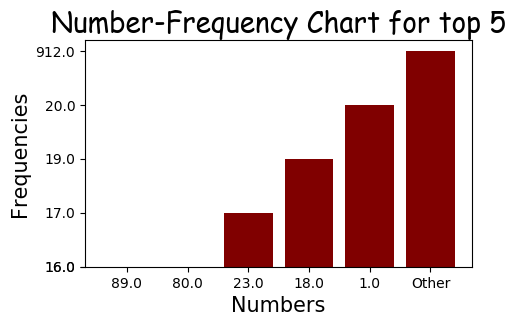

In [30]:
#Now plotting a bar chart of this

x = []
for i in list(freq2['Number'].values):
    x.append(str(i))
    
y = []
for j in list(freq2['Frequency'].values):
    y.append(str(j))
    
#Had to define x and y as empty lists and fill them element-wise, as directly passing freq2['Number'].values and 
#freq2['Frequency'].values (or varying them slightly) in plt.bar() kept giving a TypeError
#Even defining x=list(freq2['Number'].values) and y=list(freq2['Frequency'].values) kept giving a TypeError saying that
#the x-type (object) and y-type (float64) are incompatible

plt.figure(figsize=(5, 3), dpi=100)
plt.bar(x, y, color="maroon", label="Top 5 and Others")

plt.title('Number-Frequency Chart for top 5', fontdict={'fontname':'Comic Sans MS', 'size':20})
plt.xlabel('Numbers', fontdict={'size':15})
plt.ylabel('Frequencies', fontdict={'size':15})

plt.xticks(x)
plt.yticks(y)    #For some reason, it's messing up the order of the elements in list y
plt.show()

In [18]:
x

['89.0', '80.0', '23.0', '18.0', '1.0', 'Other']

In [19]:
y

['16.0', '16.0', '17.0', '19.0', '20.0', '912.0']